In [1]:
import tensorflow as tf
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
from sklearn.model_selection import train_test_split
data = np.genfromtxt('../dataset/training_data_LSTM_FS_3_AnkleBeltWristBW.csv', delimiter=',')
train, test = train_test_split(data, test_size=0.2)
print(train.shape)
print(test.shape)

(1608, 139)
(402, 139)


In [3]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized Confusion Matrix'
        else:
            title = 'Confusion Matrix, without Normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, without Normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(20, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center", fontsize=15,
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [4]:
n_original_input = 138     # 입력데이터의 속성 수
n_input = [112, 125, 112]
n_step = 5       # 한 번에 입력할 데이터 수
n_class = 11     # 결과값의 종류 수 (Activity 1~11)
batch_size = 1   # 배치 크기 (ex. n_step개 데이터 batch_size묶음이 1배치)
n_epoch = 50     # 총 학습 횟수

n_hidden = 128
learning_rate = 0.001

n_model = 9
n_data = 3

In [5]:
# epoch 당 batch 수 계산
train_batch = train.shape[0]//(batch_size*n_step)
print(train_batch)
test_batch = test.shape[0]//(batch_size*n_step)
print(test_batch)

321
80


In [6]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

x_train_temp = train[:, :n_original_input]
y_train_temp = train[:, -1]

x_train = []
x_train.append(x_train_temp[:, [0, 1, 2, 3, 4, 5, 6, 7, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 133, 134, 135, 136, 137]])
x_train.append(x_train_temp[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137]])
x_train.append(x_train_temp[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 137]])

#sess = tf.Session()
y_train_temp = np.subtract(y_train_temp, np.ones(y_train_temp.shape))
#y_train_temp = tf.one_hot(y_train_temp, depth=n_class).eval(session=sess)
y_train_temp = np.array(y_train_temp).reshape(-1, 1)
enc.fit(y_train_temp)
y_train_temp = enc.transform(y_train_temp).toarray()

y_train = np.zeros([train_batch, n_class])
for i in range(train_batch):
    y_train[i] = y_train_temp[n_step * i]
    
#x_train = x_train.tolist()
y_train = y_train.tolist()

print(len(x_train))
print(len(y_train))

3
321


c:\users\a jin cho\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [7]:
x_test_temp = test[:, :n_original_input]
y_test_temp = test[:, -1]

x_test = []
x_test.append(x_test_temp[:, [0, 1, 2, 3, 4, 5, 6, 7, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 133, 134, 135, 136, 137]])
x_test.append(x_test_temp[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137]])
x_test.append(x_test_temp[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 137]])

#sess = tf.Session()
y_test_temp = np.subtract(y_test_temp, np.ones(y_test_temp.shape))
#y_test_temp = tf.one_hot(y_test_temp, depth=n_class).eval(session=sess)
y_test_temp = np.array(y_test_temp).reshape(-1, 1)
enc.fit(y_test_temp)
y_test_temp = enc.transform(y_test_temp).toarray()

y_test = np.zeros([test_batch, n_class])
for i in range(test_batch):
    y_test[i] = y_test_temp[n_step * i]

#x_test = x_test.tolist()
y_test = y_test.tolist()

print(len(x_test))
print(len(y_test))

#sess.close()

3
80


c:\users\a jin cho\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [8]:
# 현재 iteration의 batch를 반환하는 함수
def get_batch(x, y, iteration, size = batch_size):
  start = size*iteration
  batch_x = []
  batch_y = []
  for i in range(size):
    batch_x.append(x[(start+i)*n_step:(start+i+1)*n_step])
    batch_y.append(y[start+i])
  return batch_x, batch_y

In [9]:
class Model:

    def __init__(self, sess, name, number):
        self.sess = sess
        self.name = name
        self.number = number
        self._build_net()
    
    def _build_net(self):
        with tf.variable_scope(self.name):
            
            self.training = tf.placeholder(tf.bool)

            # RNN 구성
            self.X = tf.placeholder(tf.float32, [None, n_step, n_input[self.number]], name='x')
            self.Y = tf.placeholder(tf.int32, [None, n_class], name='y')

            self.W = tf.Variable(tf.truncated_normal([n_hidden, n_class]))
            self.b = tf.Variable(tf.truncated_normal([n_class]))

            cell1 = tf.nn.rnn_cell.BasicLSTMCell(n_hidden)
            cell1 = tf.nn.rnn_cell.DropoutWrapper(cell1, output_keep_prob=1)
            cell2 = tf.nn.rnn_cell.BasicLSTMCell(n_hidden)
            cell2 = tf.nn.rnn_cell.DropoutWrapper(cell2, output_keep_prob=0.8)
            cell3 = tf.nn.rnn_cell.BasicLSTMCell(n_hidden)
            cell3 = tf.nn.rnn_cell.DropoutWrapper(cell3, output_keep_prob=1)
            cell4 = tf.nn.rnn_cell.BasicLSTMCell(n_hidden)
            cell4 = tf.nn.rnn_cell.DropoutWrapper(cell4, output_keep_prob=0.8)
            cell5 = tf.nn.rnn_cell.BasicLSTMCell(n_hidden)
            cell5 = tf.nn.rnn_cell.DropoutWrapper(cell5, output_keep_prob=1)
            cell6 = tf.nn.rnn_cell.BasicLSTMCell(n_hidden)
            cell6 = tf.nn.rnn_cell.DropoutWrapper(cell6, output_keep_prob=0.8)
            cell7 = tf.nn.rnn_cell.BasicLSTMCell(n_hidden)
            cell7 = tf.nn.rnn_cell.DropoutWrapper(cell7, output_keep_prob=1)
            cell8 = tf.nn.rnn_cell.BasicLSTMCell(n_hidden)

            multi_cell = tf.nn.rnn_cell.MultiRNNCell([cell1, cell2, cell3, cell4, cell5, cell6, cell7, cell8])

            output, state = tf.nn.dynamic_rnn(multi_cell, self.X, dtype=tf.float32)
            output = tf.transpose(output, [1,0,2])
            output = output[-1]

            self.model = tf.matmul(output, self.W) + self.b
    
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=self.model, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(self.cost)
    
        self.is_correct = tf.equal(tf.argmax(self.model, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(self.is_correct, tf.float32))
    
    def predict(self, x_test, training=False):
        return self.sess.run(self.model, feed_dict={self.X: x_test, self.training: training})
    
    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y: y_test, self.training: training})
    
    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={self.X: x_data, self.Y: y_data, self.training: training})

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
epoch: 0001 cost = [2.28446035 2.39553293 2.2224665  2.40488537 2.22389485 2.28755294
 2.46237283 2.2812938  2.50317871]
epoch: 0002 cost = [1.8997343  1.99418545 1.92192944 2.00427248 1.90157942 1.87534084
 2.05319449 1.88504604 2.12483911]
epoch: 0003 cost = [1.8081978  1.79009864 1.82280956 1.85604247 1.80324266 1.7769203
 1.84955025 1.59651636 1.86591042]
epoch: 0004 cost = [1.68466531 1.65782376 1.74014935 1.74484814 1.76889242 1.53701892
 1.7

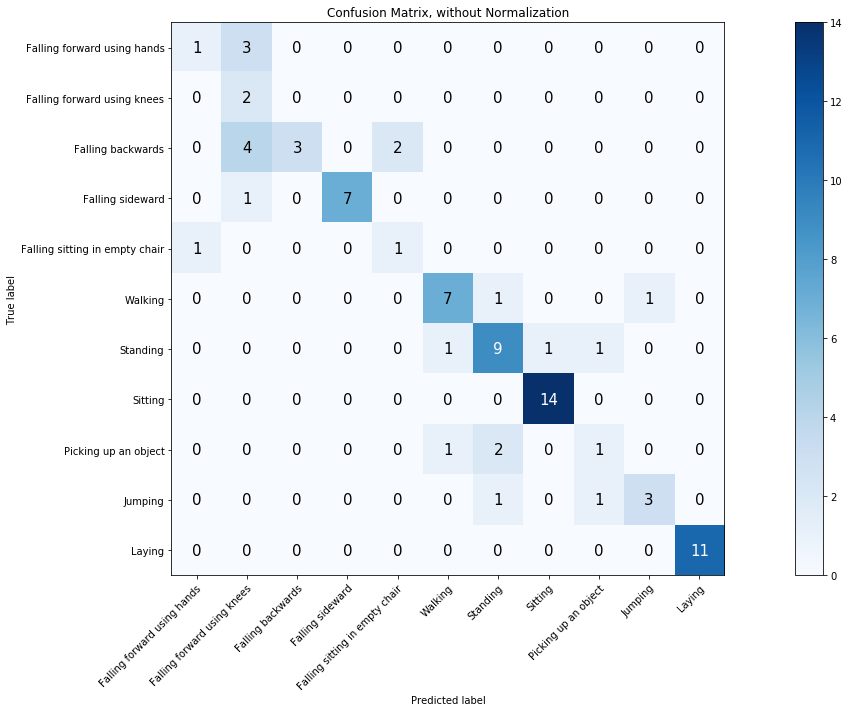

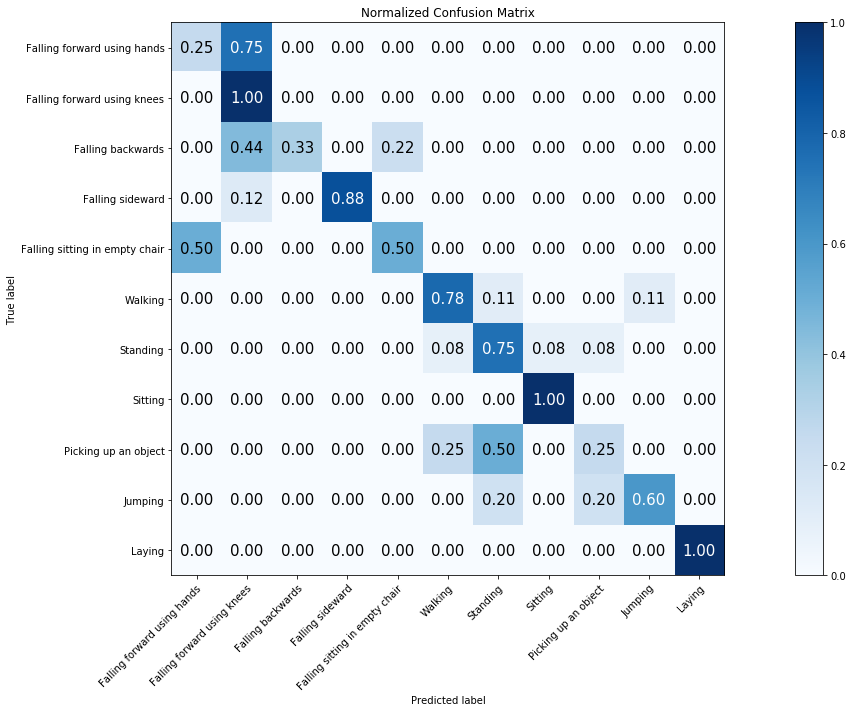

In [10]:
# 세션 실행
sess = tf.Session()

models = []
for m in range(n_model):
    models.append(Model(sess, "model" + str(m), int(m % n_data)))

sess.run(tf.global_variables_initializer())

# 학습
for i in range(n_epoch):
    avg_cost_list = np.zeros(len(models))
    for j in range(train_batch):
      
    # train each model
        for m_idx, m in enumerate(models):
            batch_x, batch_y = get_batch(x_train[int(m_idx % n_data)], y_train, j)
            c, _ = m.train(batch_x, batch_y)
            avg_cost_list[m_idx] += c / train_batch
            
    print('epoch:', '%04d' % (i + 1), 'cost =', avg_cost_list)

# 모델 테스트
total_acc = np.zeros(len(models))
train_predictions = np.zeros([train_batch, n_class])
#for k in range(train_batch):
for m_idx, m in enumerate(models):
    test_x, test_y = get_batch(x_train[int(m_idx % n_data)], y_train, 0, train_batch)
    acc = m.get_accuracy(test_x, test_y)
    total_acc[m_idx] += acc
    p = m.predict(test_x)
    train_predictions += p
ensemble_correct_prediction = tf.equal(tf.argmax(train_predictions, 1), tf.argmax(test_y, 1))
ensemble_accuracy = tf.reduce_mean(tf.cast(ensemble_correct_prediction, tf.float32))
print('---train ensemble accuracy:', sess.run(ensemble_accuracy))

# 모델 테스트
total_acc = np.zeros(len(models))
test_predictions = np.zeros([test_batch, n_class])
#for k in range(train_batch):
for m_idx, m in enumerate(models):
    test_x, test_y = get_batch(x_test[int(m_idx % n_data)], y_test, 0, test_batch)
    acc = m.get_accuracy(test_x, test_y)
    total_acc[m_idx] += acc
    p = m.predict(test_x)
    test_predictions += p
ensemble_correct_prediction = tf.equal(tf.argmax(test_predictions, 1), tf.argmax(test_y, 1))
ensemble_accuracy = tf.reduce_mean(tf.cast(ensemble_correct_prediction, tf.float32))
print('---test ensemble accuracy:', sess.run(ensemble_accuracy))

# confusion matrix
'''
train_x, train_y = get_batch(x_train, y_train, 0, train_batch)
cm = tf.confusion_matrix(tf.argmax(train_y, 1), tf.argmax(sess.run(model, feed_dict={X: train_x, Y: train_y}), 1), n_class)
test_x, test_y = get_batch(x_test, y_test, 0, test_batch)
cm += tf.confusion_matrix(tf.argmax(test_y, 1), tf.argmax(sess.run(model, feed_dict={X: test_x, Y: test_y}), 1), n_class)
# df_cm = pd.DataFrame(sess.run(cm), range(n_class), range(n_class))
df_cm = pd.DataFrame(sess.run(cm), index=["Falling forward using hands", "Falling forward using knees", "Falling backwards", "Falling sideward", "Falling sitting in empty chair", "Walking", "Standing", "Sitting", "Picking up an object", "Jumping", "Laying"], columns=["Falling forward using hands", "Falling forward using knees", "Falling backwards", "Falling sideward", "Falling sitting in empty chair", "Walking", "Standing", "Sitting", "Picking up an object", "Jumping", "Laying"])
# plt.figure(figsize = (10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size
'''
np.set_printoptions(precision=2)
y_pred = np.argmax(test_predictions, axis=1).reshape(-1)
print(y_pred.shape)
print(y_pred)
classes = ['Falling forward using hands', 'Falling forward using knees', 'Falling backwards', 'Falling sideward', 'Falling sitting in empty chair', 'Walking', 'Standing', 'Sitting', 'Picking up an object', 'Jumping', 'Laying']

y_act = np.argmax(y_test, axis=1).reshape(-1)
print(y_act.shape)
print(y_act)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_act, y_pred, classes=classes, title='Confusion Matrix, without Normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_act, y_pred, classes=classes, normalize=True, title='Normalized Confusion Matrix')

plt.show()

In [11]:
from tkinter import *
import imageio
from PIL import Image, ImageTk
from pathlib import Path
import random

def stream(label, video, delay):
    try:
        image = video.get_next_data()
    except:
        video.close()
        return
    label.after(delay, lambda: stream(label, video, delay))
    frame_image = ImageTk.PhotoImage(Image.fromarray(image))
    label.config(image=frame_image)
    label.image = frame_image
    
def getResult(activity):
    rand = 0
    while(True):
        rand = random.randrange(0, test_batch)
        test_x, test_y = get_batch(x_test[0], y_test, rand)
        if(np.argmax(test_y, 1) == [activity]):
            break
    
    test_prediction = np.zeros([1, n_class])
    for m_idx, m in enumerate(models):
        test_x, test_y = get_batch(x_test[int(m_idx % n_data)], y_test, rand)
        p = m.predict(test_x)
        test_prediction += p
    
    if(np.argmax(test_prediction, 1).reshape(-1) == [0]):
        label[2].config(text = "Classification result: Falling forward using hands")
    elif(np.argmax(test_prediction, 1).reshape(-1) == [1]):
        label[2].config(text = "Classification result: Falling forward using knees")
    elif(np.argmax(test_prediction, 1).reshape(-1) == [2]):
        label[2].config(text = "Classification result: Falling backward")
    elif(np.argmax(test_prediction, 1).reshape(-1) == [3]):
        label[2].config(text = "Classification result: Falling sideward")
    elif(np.argmax(test_prediction, 1).reshape(-1) == [4]):
        label[2].config(text = "Classification result: Falling sitting in empty chair")
    elif(np.argmax(test_prediction, 1).reshape(-1) == [5]):
        label[2].config(text = "Classification result: Walking")
    elif(np.argmax(test_prediction, 1).reshape(-1) == [6]):
        label[2].config(text = "Classification result: Standing")
    elif(np.argmax(test_prediction, 1).reshape(-1) == [7]):
        label[2].config(text = "Classification result: Sitting")
    elif(np.argmax(test_prediction, 1).reshape(-1) == [8]):
        label[2].config(text = "Classification result: Picking up an object")
    elif(np.argmax(test_prediction, 1).reshape(-1) == [9]):
        label[2].config(text = "Classification result: Jumping")
    else:
        label[2].config(text = "Classification result: Laying")

def fallingForwardUsingHands():
    video_name = str(Path().absolute()) + '/../video/0.mp4'
    video = imageio.get_reader(video_name)
    delay = int(1000 / video.get_meta_data()['fps'])
    
    label[0].after(delay, lambda: stream(label[0], video, delay))
    label[1].config(text = "Button clicked: Falling forward using hands")
    
    getResult(0)

def fallingForwardUsingKnees():
    video_name = str(Path().absolute()) + '/../video/1.mp4'
    video = imageio.get_reader(video_name)
    delay = int(1000 / video.get_meta_data()['fps'])
    
    label[0].after(delay, lambda: stream(label[0], video, delay))
    label[1].config(text = "Button clicked: Falling forward using knees")
    
    getResult(1)

def fallingBackward():
    video_name = str(Path().absolute()) + '/../video/2.mp4'
    video = imageio.get_reader(video_name)
    delay = int(1000 / video.get_meta_data()['fps'])
    
    label[0].after(delay, lambda: stream(label[0], video, delay))
    label[1].config(text = "Button clicked: Falling backward")
    
    getResult(2)
    
def fallingSideward():
    video_name = str(Path().absolute()) + '/../video/3.mp4'
    video = imageio.get_reader(video_name)
    delay = int(1000 / video.get_meta_data()['fps'])
    
    label[0].after(delay, lambda: stream(label[0], video, delay))
    label[1].config(text = "Button clicked: Falling sideward")
    
    getResult(3)

def fallingSittingInEmptyChair():
    video_name = str(Path().absolute()) + '/../video/4.mp4'
    video = imageio.get_reader(video_name)
    delay = int(1000 / video.get_meta_data()['fps'])
    
    label[0].after(delay, lambda: stream(label[0], video, delay))
    label[1].config(text = "Button clicked: Falling sitting in empty chair")
    
    getResult(4)

def walking():
    video_name = str(Path().absolute()) + '/../video/5.mp4'
    video = imageio.get_reader(video_name)
    delay = int(1000 / video.get_meta_data()['fps'])
    
    label[0].after(delay, lambda: stream(label[0], video, delay))
    label[1].config(text = "Button clicked: Walking")
    
    getResult(5)

def standing():
    video_name = str(Path().absolute()) + '/../video/6.mp4'
    video = imageio.get_reader(video_name)
    delay = int(1000 / video.get_meta_data()['fps'])
    
    label[0].after(delay, lambda: stream(label[0], video, delay))
    label[1].config(text = "Button clicked: Standing")
    
    getResult(6)

def sitting():
    video_name = str(Path().absolute()) + '/../video/7.mp4'
    video = imageio.get_reader(video_name)
    delay = int(1000 / video.get_meta_data()['fps'])
    
    label[0].after(delay, lambda: stream(label[0], video, delay))
    label[1].config(text = "Button clicked: Sitting")
    
    getResult(7)

def pickingUpAnObject():
    video_name = str(Path().absolute()) + '/../video/8.mp4'
    video = imageio.get_reader(video_name)
    delay = int(1000 / video.get_meta_data()['fps'])
    
    label[0].after(delay, lambda: stream(label[0], video, delay))
    label[1].config(text = "Button clicked: Picking up an object")
    
    getResult(8)
    
def jumping():
    video_name = str(Path().absolute()) + '/../video/9.mp4'
    video = imageio.get_reader(video_name)
    delay = int(1000 / video.get_meta_data()['fps'])
    
    label[0].after(delay, lambda: stream(label[0], video, delay))
    label[1].config(text = "Button clicked: Jumping")
    
    getResult(9)

def laying():
    video_name = str(Path().absolute()) + '/../video/10.mp4'
    video = imageio.get_reader(video_name)
    delay = int(1000 / video.get_meta_data()['fps'])
    
    label[0].after(delay, lambda: stream(label[0], video, delay))
    label[1].config(text = "Button clicked: Laying")
    
    getResult(10)
    
window = Tk()
window.title('Fall Detection Program')
window.resizable(False, False)

label = []
label.append(Label(window, text="Video", relief = "groove"))
label.append(Label(window, text="Button clicked: ", width = 60, anchor = "w"))
label.append(Label(window, text="Classification result: ", width = 60, anchor = "w"))

label[0].grid(row = 0, column = 0, rowspan = 6)
label[1].grid(row = 0, column = 1, columnspan = 3)
label[2].grid(row = 1, column = 1, columnspan = 3)

btn = []
btn.append(Button(window, text="Falling forward\nusing hands", command=fallingForwardUsingHands, width = 20, height = 3))
btn.append(Button(window, text="Falling forward\nusing knees", command=fallingForwardUsingKnees, width = 20, height = 3))
btn.append(Button(window, text="Falling backward", command=fallingBackward, width = 20, height = 3))
btn.append(Button(window, text="Falling sideward", command=fallingSideward, width = 20, height = 3))
btn.append(Button(window, text="Falling sitting\nin empty chair", command=fallingSittingInEmptyChair, width = 20, height = 3))
btn.append(Button(window, text="Walking", command=walking, width = 20, height = 3))
btn.append(Button(window, text="Standing", command=standing, width = 20, height = 3))
btn.append(Button(window, text="Sitting", command=sitting, width = 20, height = 3))
btn.append(Button(window, text="Picking up\nan object", command=pickingUpAnObject, width = 20, height = 3))
btn.append(Button(window, text="Jumping", command=jumping, width = 20, height = 3))
btn.append(Button(window, text="Laying", command=laying, width = 20, height = 3))

btn[0].grid(row = 2, column = 1)
btn[1].grid(row = 2, column = 2)
btn[2].grid(row = 2, column = 3)
btn[3].grid(row = 3, column = 1)
btn[4].grid(row = 3, column = 2)
btn[5].grid(row = 3, column = 3)
btn[6].grid(row = 4, column = 1)
btn[7].grid(row = 4, column = 2)
btn[8].grid(row = 4, column = 3)
btn[9].grid(row = 5, column = 1)
btn[10].grid(row = 5, column = 2)
 
window.mainloop()

In [12]:
x_total_data = []
x_total_data.append(np.concatenate((x_train[0], x_test[0])))
x_total_data.append(np.concatenate((x_train[1], x_test[1])))
x_total_data.append(np.concatenate((x_train[2], x_test[2])))
y_total_data = y_train + y_test

print(len(x_total_data))
print(len(x_total_data[0]))
print(len(x_total_data[1]))
print(len(x_total_data[2]))
print(len(y_total_data))

total_predictions = np.zeros([test_batch + train_batch, n_class])
for m_idx, m in enumerate(models):
    total_x, total_y = get_batch(x_total_data[int(m_idx % n_data)], y_total_data, 0, test_batch + train_batch)
    p = m.predict(total_x)
    total_predictions += p

y_total_data = np.asarray(y_total_data)
y_total_data = np.argmax(y_total_data, axis=1).reshape(-1, 1)
y_total_data += 1

total_predictions = np.append(total_predictions, y_total_data, axis=1)
        
data = pd.DataFrame(total_predictions)

data.to_csv("../dataset/training_data_after_ensemble.csv", mode='a', sep=",", header=False, index=False)

3
2010
2010
2010
401


In [13]:
sess.close()